<a href="https://colab.research.google.com/github/alam121/Virtual-Telepresense-Robot-Raspberry-Pi/blob/master/Pathplanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__file__ start!!
Artificial Potential Field Start!!
angle:  53.13010235415598 x and y position 0.0 0.0 next position is 0.012 0.016 1.3333333333333333
angle:  53.13010235415598 x and y position 0.012 0.016 next position is 0.024 0.032 1.3333333333333333
angle:  53.13010235415597 x and y position 0.024 0.032 next position is 0.036000000000000004 0.048 1.333333333333333
angle:  53.130102354155994 x and y position 0.036000000000000004 0.048 next position is 0.048 0.064 1.3333333333333337
angle:  53.13010235415597 x and y position 0.048 0.064 next position is 0.060000000000000005 0.08 1.333333333333333
angle:  53.13010235415597 x and y position 0.060000000000000005 0.08 next position is 0.07200000000000001 0.096 1.333333333333333
angle:  53.130102354155994 x and y position 0.07200000000000001 0.096 next position is 0.084 0.112 1.3333333333333337
angle:  53.130102354155994 x and y position 0.084 0.112 next position is 0.096 0.128 1.3333333333333337
angle:  53.13010235415601 x and y position

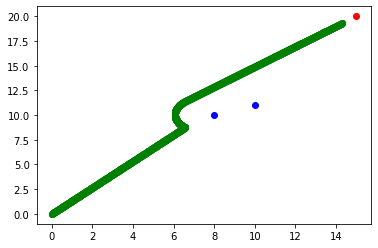

__file__ Done!!


In [42]:
"""

Artificial Potential Field based path planner
author: Jeonggeun Lim
Reference:
https://github.com/AtsushiSakai/PythonRobotics/blob/master/PathPlanning/PotentialFieldPlanning/potential_field_planning.py

"""

import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
# Parameters
Kp_att = 0.02
Kp_rel = 3.0
obstacle_bound = 2.0

def calc_attractive_force(x,y,gx,gy):
	e_x, e_y = gx-x, gy-y
	distance = np.linalg.norm([e_x,e_y])

	att_x = Kp_att * e_x/distance
	att_y = Kp_att * e_y/distance

	return att_x, att_y

def calc_repulsive_force(x,y,obs):

	rep_x,rep_y = 0,0

	for obs_xy in np.ndindex(obs.shape[0]):

		obs_dis_x, obs_dis_y = obs[obs_xy][0]-x, obs[obs_xy][1]-y 
		obs_dis = np.linalg.norm([obs_dis_x,obs_dis_y]) 

		if obs_dis < obstacle_bound:
			rep_x = rep_x - Kp_rel * (1/obs_dis - 1/obstacle_bound)*(1/(obs_dis*obs_dis))*obs_dis_x/obs_dis
			rep_y = rep_y - Kp_rel * (1/obs_dis - 1/obstacle_bound)*(1/(obs_dis*obs_dis))*obs_dis_y/obs_dis
		else:
			rep_x = rep_x
			rep_y = rep_y

	return rep_x, rep_y

def Artificial_Potention_Field(start_x,start_y,goal_x,goal_y,obs):

  x,y = start_x,start_y

  trace_x = []
  trace_y = []

  trace_x.append(x)
  trace_y.append(y)

  while(1):
    att_x, att_y = calc_attractive_force(x,y,goal_x,goal_y)
    rep_x, rep_y = calc_repulsive_force(x,y,obs)

    pot_x = att_x+rep_x
    pot_y = att_y+rep_y
    change_x = x + pot_x
    change_y = y + pot_y
    e = (change_y-y)/(change_x-x)
    angle = math.atan(e)*180 / math.pi
    print("angle: " , angle, "x and y position", x,y, "next position is", change_x, change_y, e)

    x = x + pot_x
    y = y + pot_y
    trace_x.append(x)
    trace_y.append(y)
    error = np.linalg.norm([goal_x-x,goal_y-y])
   

    #print(x,y)
    #print(goal_x, goal_y)


    if error < 1:
      plt.plot(obs[:,0],obs[:,1],'bo')
      plt.plot(trace_x,trace_y,'go',goal_x,goal_y,'ro')
      plt.show()
      break

def main():
	print("Artificial Potential Field Start!!")

	start_x, start_y = 0.0, 0.0
	goal_x, goal_y = 15.0, 20.0

	obs = np.array([[8.0,10.0],
					[10.0,11.0]])

	Artificial_Potention_Field(start_x,start_y,goal_x,goal_y,obs)

if __name__=='__main__':
	print('__file__'+" start!!")
	main()
	print('__file__'+" Done!!")